In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot


# Reading the Data


In [3]:
df = pd.read_csv("car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Exploratory Data Analysis (EDA)

In [4]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [5]:
df.shape

(1727, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.columns = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety', 'Decision']

In [8]:
df.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.describe()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [10]:
df.isnull().sum()

Price                   0
Maintenance Cost        0
Number of Doors         0
Capacity                0
Size of Luggage Boot    0
safety                  0
Decision                0
dtype: int64

# Data Visualization

In [11]:

labels = df['Price'].value_counts().index
values = df['Price'].value_counts().values

colors = df['Price']

fig = go.Figure(data = [go.Pie(labels=labels, values=values, textinfo="label+percent",
                              insidetextorientation = "radial", marker=dict(colors=colors))])

fig.show()

In [12]:
# Visualizing the maintenance cost


labels = df['Maintenance Cost'].value_counts().index
values = df['Maintenance Cost'].value_counts().values

colors = df['Maintenance Cost']

fig = go.Figure(data = [go.Pie(labels=labels, values=values, textinfo="label+percent",
                              insidetextorientation = "radial", marker=dict(colors=colors))])

fig.show()

In [13]:
# Visualizing the distribution of number of Doors


labels = df['Number of Doors'].value_counts().index
values = df['Number of Doors'].value_counts().values

colors = df['Number of Doors']

fig = go.Figure(data = [go.Pie(labels=labels, values=values, textinfo="label+percent",
                              insidetextorientation = "radial", marker=dict(colors=colors))])

fig.show()

It seems the data has car ranging from having 2 doors to more than 5 doors

In [14]:
# Visualizing the distribution of number of Persons who can accomodate in the Car


labels = df['Capacity'].value_counts().index
values = df['Capacity'].value_counts().values

colors = df['Capacity']

fig = go.Figure(data = [go.Pie(labels=labels, values=values, textinfo="label+percent",
                              insidetextorientation = "radial", marker=dict(colors=colors))])

fig.show()

In [15]:
# Visualizing the dataset for Size of Luggage Boot


labels = df['Size of Luggage Boot'].value_counts().index
values = df['Size of Luggage Boot'].value_counts().values

colors = df['Size of Luggage Boot']

fig = go.Figure(data = [go.Pie(labels=labels, values=values, textinfo="label+percent",
                              insidetextorientation = "radial", marker=dict(colors=colors))])

fig.show()

In [16]:
# Visualizing the dataset for Size of Luggage Boot


labels = df['safety'].value_counts().index
values = df['safety'].value_counts().values

colors = df['safety']

fig = go.Figure(data = [go.Pie(labels=labels, values=values, textinfo="label+percent",
                              insidetextorientation = "radial", marker=dict(colors=colors))])

fig.show()

## Splitting the Data into Train and Test Set

In [17]:
X = df.drop(['Decision'], axis = 1)
y = df['Decision']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (1381, 6)
The size of training output is (1381,)
The size of testing input is (346, 6)
The size of testing output is (346,)


# Feature Engineering

In [20]:
import category_encoders as ce

In [21]:
# Encoding the variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [22]:
X_train.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [23]:
X_test.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [24]:
y_train.head()

107     unacc
900     unacc
1708    unacc
705     unacc
678     unacc
Name: Decision, dtype: object

In [25]:
y_test.head()

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
Name: Decision, dtype: object

# Model Building


### Decision Tree Classifier

In [26]:
# Importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Fitting/Training the Model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
# Predicting Test set results using the Criterion Gini Index
y_pred = clf.predict(X_test)

In [28]:
# finding the training and testing accuracy
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  0.7921795800144823
Testing Accuracy:  0.7687861271676301


From the above output we can see that there is huge variation in the train set and test accuracy

In [29]:
# Printing the scores on training and test set

print('Training set Score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set Score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set Score: 0.7922
Test set Score: 0.7688


#### Visualizing Decision Tree

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 2.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'entropy = 1.147\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.711\nsamples = 314\nvalue = [171, 54, 49, 40]')]

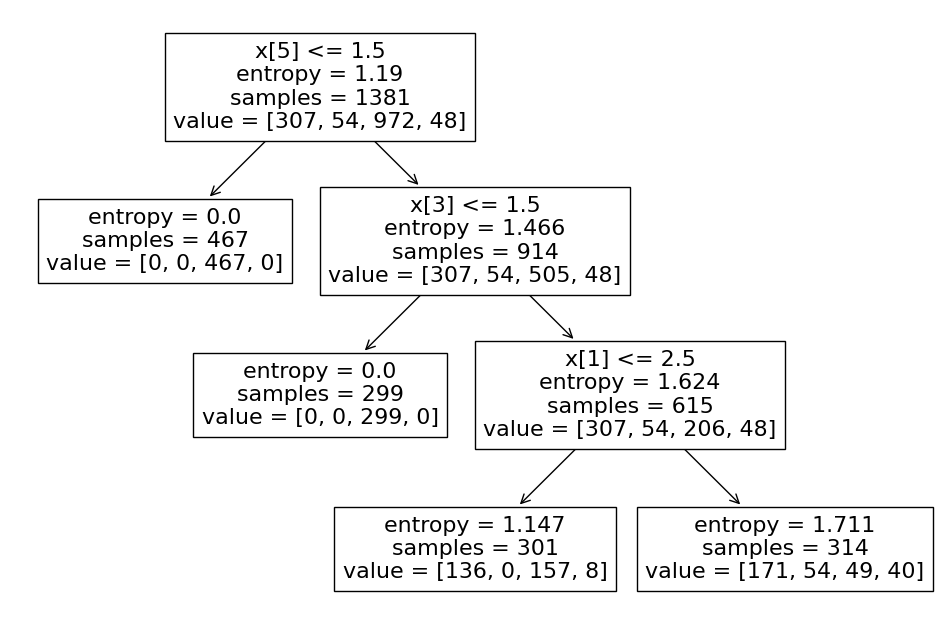

In [30]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train))

#### Visualizing the Decision Trees with GraphViz

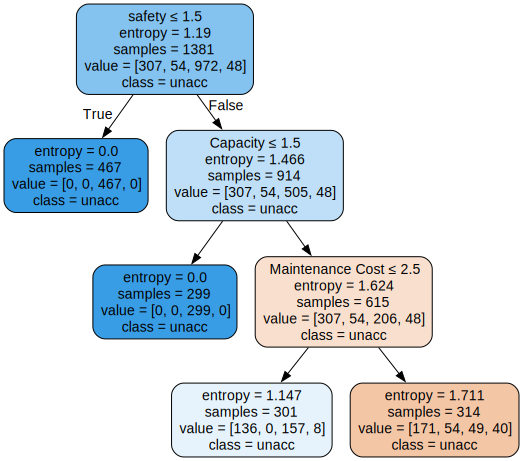

In [31]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = X_train.columns,
                               class_names = y_train, filled = True, rounded = True, 
                               special_characters = True)

graph = graphviz.Source(dot_data)

graph

#### Confusion Matrix


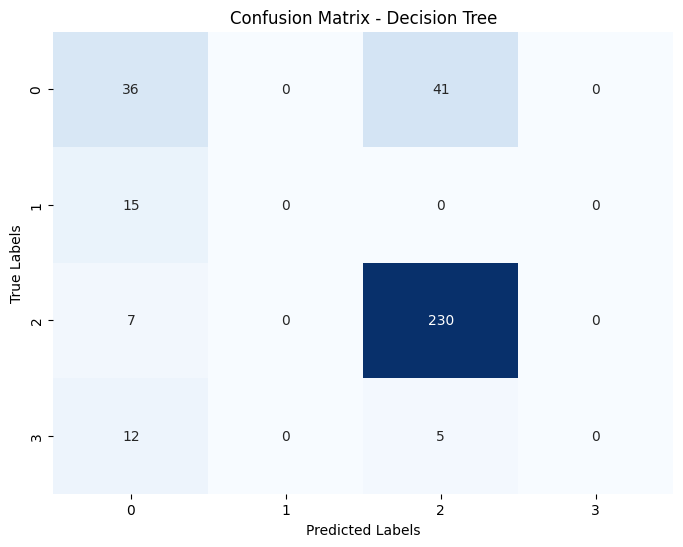

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train the model
clf.fit(X_train, y_train)

# Predict labels for test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Random Forest


In [33]:
# importing the Libraris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Creating a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting the value for X_test
y_pred = model.predict(X_test)



In [34]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9479768786127167


#### Confusion Matrix

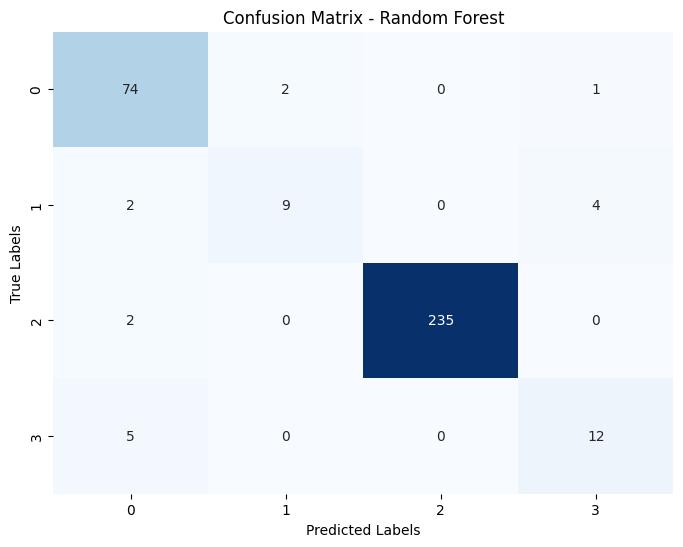

In [35]:
# Train the model
model.fit(X_train, y_train)

# Predict labels for test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### K-Nearest Neighbour Classifier


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# creating a model
model = KNeighborsClassifier(n_neighbors = 5)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)



In [37]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.9478638667632151
Testing Accuracy:  0.8728323699421965


#### Confusion Matrix


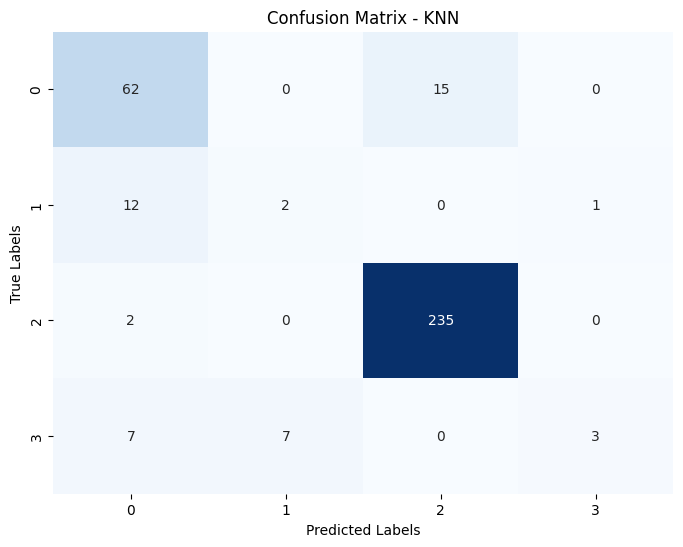

In [38]:
# Train the model
model.fit(X_train, y_train)

# Predict labels for test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Logistic regression

In [39]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Importing the required Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Defining model

model = LogisticRegression()

model.fit(X_train, y_train)

# Predicting the values for x-test
y_pred = model.predict(X_test)

In [41]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.7849384503982622
Testing Accuracy:  0.7485549132947977


#### Confusion Matrix


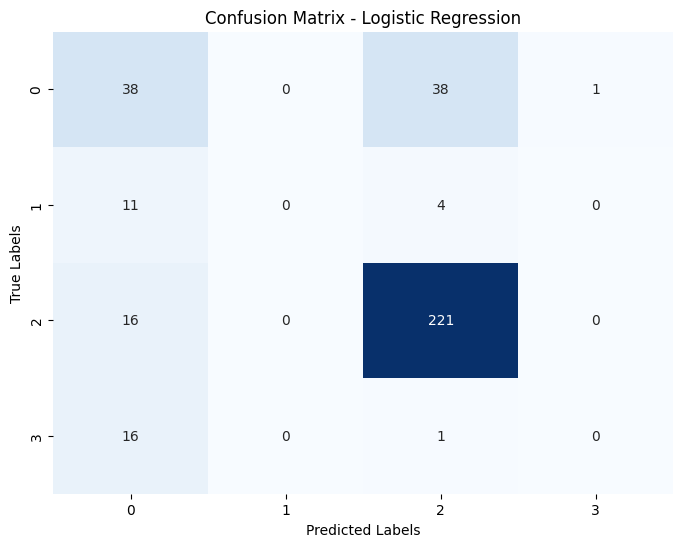

In [44]:
# Train the model
model.fit(X_train, y_train)

# Predict labels for test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Comparison

                 Model  Training Accuracy  Testing Accuracy
0        Decision Tree           0.792180          0.768786
1        Random Forest           1.000000          0.959538
2                  KNN           0.974656          0.919075
3  Logistic Regression           0.784938          0.748555


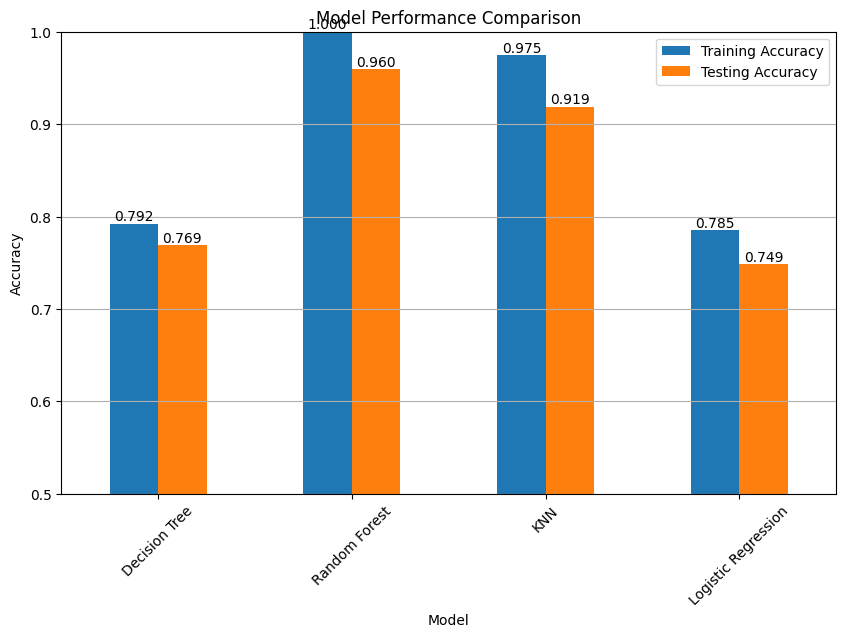

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression()
}

# Standardization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Store accuracies
accuracies = {"Model": [], "Training Accuracy": [], "Testing Accuracy": []}

for name, model in models.items():
    # Training the model
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    
    # Predictions
    if name == "Logistic Regression":
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
    else:
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    # Store accuracies
    accuracies["Model"].append(name)
    accuracies["Training Accuracy"].append(train_acc)
    accuracies["Testing Accuracy"].append(test_acc)

# Create DataFrame
results_df = pd.DataFrame(accuracies)

# Display results
print(results_df)

# Plot results
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend(loc='upper right')

# Add annotations
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()
